In [11]:
# -*- coding: utf-8 -*-
"""
Speedtester using speedtest-cli
@author: Kemal
"""
import speedtest
from prettytable import PrettyTable
import pandas as pd
import plotly.graph_objects as go

# Tweak some IPython settings for convenience
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Image


'\nSpeedtester using speedtest-cli\n@author: Kemal\n'

In [3]:
#%% Create speedtest object
test = speedtest.Speedtest()

In [5]:
#%% List of servers in dict
servers = test.get_servers() 
print(type(servers))

<class 'dict'>


In [6]:
#%% Store servers in a DF
# type(servers) = dict
# 'dict_keys' object is not subscriptable, convert it to list
serverKeys = list(servers.keys())

# create first element of the dataframe, then append using server keys
df = pd.json_normalize(servers,record_path=[serverKeys[0]])

for key in serverKeys:
    df = df.append(pd.json_normalize(servers,record_path=[key]))
    
df

,url,lat,lon,name,country,cc,sponsor,id,host,d
0,http://speedtest.rcs-rds.ro:8080/speedtest/upl...,44.4167,26.1000,Bucharest,Romania,RO,RCS & RDS,11494,speedtest.rcs-rds.ro:8080,442.138654
1,http://speed.vodafone.ro:8080/speedtest/upload...,44.4167,26.1000,Bucharest,Romania,RO,Vodafone Romania Mobile,14137,speed.vodafone.ro:8080,442.138654
2,http://speedtest.gtstelecom.ro:8080/speedtest/...,44.4167,26.1000,Bucharest,Romania,RO,GTS Telecom,29707,speedtest.gtstelecom.ro:8080,442.138654
3,http://sp1.dotrotelecom.ro:8080/speedtest/uplo...,44.4167,26.1000,Bucharest,Romania,RO,DOTRO Telecom,7609,sp1.dotrotelecom.ro:8080,442.138654
4,https://speed.hosterion.net:8080/speedtest/upl...,44.4167,26.1000,Bucharest,Romania,RO,HOSTERION SRL,46454,speed.hosterion.net:8080,442.138654
0,http://speedtest.rcs-rds.ro:8080/speedtest/upl...,44.4167,26.1000,Bucharest,Romania,RO,RCS & RDS,11494,speedtest.rcs-rds.ro:8080,442.138654
1,http://speed.vodafone.ro:8080/speedtest/upload...,44.4167,26.1000,Bucharest,Romania,RO,Vodafone Romania Mobile,14137,speed.vodafone.ro:8080,442.138654
2,http://speedtest.gtstelecom.ro:8080/speedtest/...,44.4167,26.1000,Bucharest,Romania,RO,GTS Telecom,29707,speedtest.gtstelecom.ro:8080,442.138654
3,http://sp1.dotrotelecom.ro:8080/speedtest/uplo...,44.4167,26.1000,Bucharest,Romania,RO,DOTRO Telecom,7609,sp1.dotrotelecom.ro:8080,442.138654
4,https://speed.hosterion.net:8080/speedtest/upl...,44.4167,26.1000,Bucharest,Romania,RO,HOSTERION SRL,46454,speed.hosterion.net:8080,442.138654


In [7]:
#%% Perform the test using the best server
print("Choosing best server..")
best = test.get_best_server()
print('Properties:')
print(best)
#bestDF = pd.read_json(best)
#bestDF
print('-------------')
print(f"Host: {best['host']} located in {best['country']}")

print("Performing Download Test...")
down_result = test.download()
print("Performing Upload Test..")
up_result = test.upload()
print("Performing Ping Test..")
ping_result = test.results.ping

#%% Print out the results using PrettyTable
tab = PrettyTable()
tab.field_names = ["Download (Mbps)","Upload (Mbps)", "Ping (ms)"]
tab.add_row([f"{down_result/(1024*1024):.2f}", f"{up_result/(1024*1024):.2f}", f"{ping_result:.2f}"]) #to convert Mbps divide by (1024^2)

print(tab)

Choosing best server..
Properties:
{'url': 'http://speed.vodafone.ro:8080/speedtest/upload.php', 'lat': '44.4167', 'lon': '26.1000', 'name': 'Bucharest', 'country': 'Romania', 'cc': 'RO', 'sponsor': 'Vodafone Romania Mobile', 'id': '14137', 'host': 'speed.vodafone.ro:8080', 'd': 442.1386539649538, 'latency': 37.726}
-------------
Host: speed.vodafone.ro:8080 located in Romania
Performing Download Test...
Performing Upload Test..
Performing Ping Test..
+-----------------+---------------+-----------+
| Download (Mbps) | Upload (Mbps) | Ping (ms) |
+-----------------+---------------+-----------+
|      44.87      |      4.65     |   37.73   |
+-----------------+---------------+-----------+


In [8]:
#%% Print results as pandas DF
speed_data={'Download (Mbps)':[round(down_result/(1024*1024),2)],
            'Upload (Mbps)':[round(up_result/(1024*1024),2)],
            'Ping (ms)':[round(ping_result,2)]}

finalDF=pd.DataFrame(speed_data)
finalDF

,Download (Mbps),Upload (Mbps),Ping (ms)
0,44.87,4.65,37.73


In [10]:
#%% Visualize the results using plotly gauge chart

# Plotly documentation for gauge chart: https://plotly.com/python/reference/indicator/
# Color palette: https://color-hex.org/color-palettes/192

fig = go.Figure(go.Indicator(
    name = "Speed Test Gauge",
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = down_result/(1024*1024),
    mode = "gauge+number+delta",
    title = {'text': "Download Speed (Mbps)", 'font':{'family':"serif", 'size':32}, 'align':"center"},
    delta = {'reference': 50},  #I set the reference according to my ISP
    gauge = {'axis': {'range': [None, 100],'tickcolor':'darkblue','tickfont':{'family':"sans-serif", 'size':20}, 'tickwidth':1},
             'bar': {'color':"#4c5a58",'line':{'color':'black', 'width':1}},
             'borderwidth': 2,
             'bordercolor': "gray",
             'shape':'angular', #( "angular" | "bullet" )
             'steps' : [
                 {'range': [0, 20], 'color': "#ffb961"},
                 {'range': [20, 40], 'color': "#f3826f"},
                 {'range': [40, 60], 'color': "#c05c7e"},
                 {'range': [60, 80], 'color': "#722d61"},
                 {'range': [80, 100], 'color': "#2d3561"}],
             'threshold' : {'line': {'color': "crimson", 'width': 4}, 'thickness': 0.75, 'value': 50}}))

fig.update_layout(paper_bgcolor = "#f5f0b8")
fig.show()



In [12]:
# The above line should display the plot, if not, save and display:
fig.write_image("result.png")

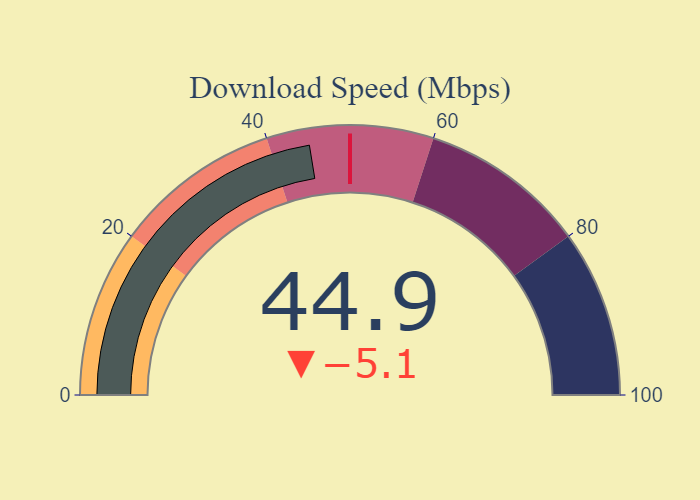

In [13]:
Image(filename='result.png') 